# Data Cleaning


In real world, data are rarely clean and homogeneous. Thus we need to pre-process the data by filling missing values because making the right decision on how to handle it generates robust data models.

It is important to be handled as they could lead to wrong prediction or classification for any given model being used.

In general, missing values could be Nan, empty string, ?, -1, -99, and so on. In order to understand if -1 is a missing value or not we could draw a histogram. If this variable has a uniform distribution between 0 and 1 and it has a small peak at -1 then -1 is actually a missing value.

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../datasets/titanic.csv')

"""
Its easy to understand features like ‘Age’, ‘Cabin’ and ‘Embarked’ contains missing values.
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [161]:
"""
Bothing empty/blank-space and `NA` are considered as missing values.
`isnull` will response as True for missing values and
`sum()` will give us the total missing values count for each of the features.
"""
total = df.isnull().sum().sort_values(ascending=False)

"""
Calculate the percent of missing values
"""
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

"""
Display count and percent of missing values as data frame.
"""
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


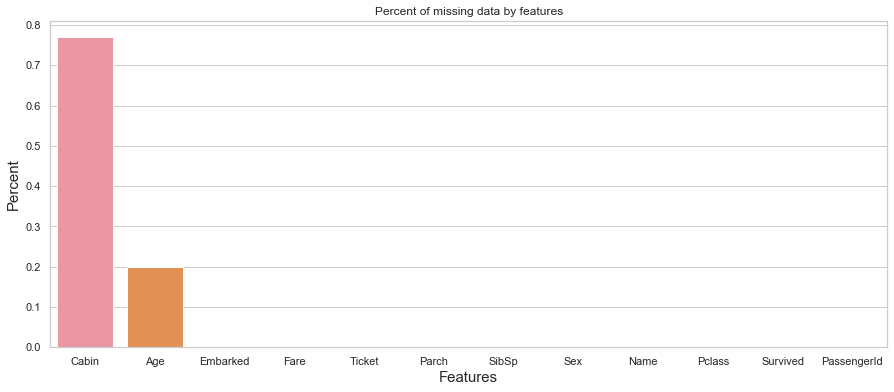

In [162]:
"""
Represent missing data in form of graph
"""
fig, ax = plt.subplots(figsize=(15, 6))
plt.xlabel("Features", fontsize=15)
plt.ylabel("Percent", fontsize=15)
plt.title("Percent of missing data by features")
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data["Percent"])

Most algorithm don't accept missing values, so we must handle them in some way and we con't simply ignore missing values in a dataset.

Here are some of the technique to handle missing values:

1. Deleting Data
2. Back-fill and Forward-fill
3. Replace with constant value
4. Replace with Mean/Median/Mode
5. Assigning an unique categories

### 1. Deleting Data

* This method is the most commonly used to handle the null values.
* We can either delete a particular record which has null value for a particular feature or a particular feature if it has more than 70-75% of missing values.
* This method is advised only when there are enough samples in the data set.

Notes:

* One has to make sure that after we have deleted the data, there is no addition of bias.
* Removing the data will lead to loss of information which will not give the expected results while predicting the output. Imagine we drop one whole observation just because one of the features had a missing value, even if the rest of the features are perfectly filled and informative!


In [163]:
dataset = df.copy(deep=True)
print(dataset.shape)

"""
Drop all features with missing values
"""
dataset.dropna(inplace=True)

"""
Drop the rows only if all the values in the row are missing
"""
# dataset.dropna(how="all", inplace=True)

"""
Just drop a feature that has some missing values
"""
# dataset.dropna(axis=1, inplace=True)

"""
Keep all the rows with at least 3 non-na values
"""
# dataset.dropna(thresh=3, inplace=True)

print(dataset.shape)
dataset.isnull().sum()

(891, 12)
(183, 12)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Notes:

* It is always better to keep data than to delete them.
* The only case that it may worth deleting a variable is when it s missing values are more than 60% of the observations but only if that variable is insignificant.
* Taking this into consideration, imputation is always a preferred choice over deleting variable.

Pros:

* Complete removal of data with missing values results in robust and highly accurate model
* Deleting a particular row or a column with no specific information is better, since it does not have a high weightage

Cons:
* Loss of information and data
* Works poorly if the percentage of missing values is high (say 30%), compared to the whole dataset

### 2. Back-fill and Forward-fill

Gaps in data like NaN values can be filled by propagating the non-NaN values forward or backward filling.

Notes:

* NaN value will remain even after forward filling or back filling if a next or previous value isn’t available or it is also a NaN value.

In [164]:
dataset = df.copy(deep=True)
print(dataset.head(10))

"""
Apply forward and back filling
"""
dataset.fillna(method="ffill", inplace=True)
dataset.fillna(method="bfill", inplace=True)
print(dataset.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

### 3. Replace with constant value

* Replace the missing value with some constant value outside fixed value range-999,-1 etc.
* This method is useful as it gives the possibility to group missing values as a separate category represented by a constant value.

In [165]:
dataset = df.copy(deep=True)
print(dataset.head(10))

dataset.fillna(-99, inplace=True)
print(dataset.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

### 4. Replace with Mean/Medium/Mode

* This approach can be applied on a feature which has numeric data like age, ticket fare etc.
* This method could yield better results compared to removal of rows and columns.
* This method is a statistical approach of handling the missing values and is also called as `Leaking the data while training`.

Notes:

* Mean: Suitable for continuous data without outliers.
* Median: Suitable for continuous data with outliers.
* Mode: Suitable for categorial features.

Pros:

* This is a better approach when the data size is small
* It can prevent data loss which results in removal of the rows and columns

Cors:

* Imputing the approximations add variance and bias
* Works poorly compared to other multiple-imputations method

In [166]:
"""
Mean approach
"""
dataset = df.copy(deep=True)
print(dataset["Age"].head(10))

print(dataset["Age"].isnull().sum())

mean_value = dataset["Age"].mean()
print(mean_value)

dataset["Age"] = dataset["Age"].replace(np.NaN, mean_value)
print(dataset["Age"].isnull().sum())
print(dataset["Age"].head(10))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64
177
29.69911764705882
0
0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64


In [167]:
"""
Median approach
"""
dataset = df.copy(deep=True)
print(dataset["Age"].head(10))

print(dataset["Age"].isnull().sum())

median_value = dataset["Age"].median()
print(median_value)

dataset["Age"] = dataset["Age"].replace(np.NaN, median_value)
print(dataset["Age"].isnull().sum())
print(dataset["Age"].head(10))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64
177
28.0
0
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64


In [169]:
"""
Mode approach
"""
dataset = df.copy(deep=True)

print(dataset["Embarked"].isnull().sum())

mode_value = dataset["Embarked"].mode()
print(mode_value)

dataset["Embarked"] = dataset["Embarked"].replace(np.NaN, mode_value)
print(dataset["Embarked"].isnull().sum())

2
0    S
dtype: object
2


### 5. Assigning an unique category

* A categorical feature will have a definite number of possibilities, like cabin, embarked etc. Since they have a definite number of classes, we can assign another class for the missing values.

* Here, the features Cabin and Embarked have missing values which can be replaced with a new category, say, U for `unknown`. This strategy will add more information into the dataset which will result in the change of variance. Since they are categorical, we need to find one hot encoding to convert it to a numeric form for the algorithm to understand it.

Pros:

* Less possibilities with one extra category, resulting in low variance after one hot encoding — since it is categorical
* Negates the loss of data by adding an unique category

Cons:

* Adds less variance
* Adds another feature to the model while encoding, which may result in poor performance

In [171]:
dataset = df.copy(deep=True)
print(dataset["Cabin"].isnull().sum())

dataset["Cabin"] = dataset["Cabin"].fillna("U")
print(dataset["Cabin"].isnull().sum())

687
0
